In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# Download Face Mask Dataset

In [2]:
# configuring the path of Kaggle.json file
# !pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

face-mask-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = 'face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
    zip.extractall()
    print('The dataset is extracted')

The dataset is extracted


In [5]:
with_mask_files = os.listdir('data/with_mask')

without_mask_files = os.listdir('data/without_mask')

text_to_delete ='.DS_Store'
while text_to_delete in with_mask_files:
    with_mask_files.remove(text_to_delete)
    print("the add file delete")

In [6]:
with_mask_labels = [1]*len(with_mask_files)
without_mask_labels = [0]*len(without_mask_files)
labels = with_mask_labels + without_mask_labels


# Data Processing

In [7]:
with_mask_path = 'data/with_mask/'

data = []

for img_file in with_mask_files:
    file_path = os.path.join(with_mask_path, img_file)
    if os.path.isfile(file_path):
        image = Image.open(file_path)
        image = image.resize((128,128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)




without_mask_path = 'data/without_mask/'


for img_file in without_mask_files:
    file_path = os.path.join(without_mask_path, img_file)
    if os.path.isfile(file_path):
        image = Image.open(file_path)
        image = image.resize((128,128))
        image = image.convert('RGB')
        image = np.array(image)
        data.append(image)

/Users/alifallaha/anaconda3/lib/python3.10/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [8]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)


# Train Test Split


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [10]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

# Building a Convolutional Neural Networks (CNN) with keras

In [11]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [12]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [13]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 18s 104ms/step - loss: 0.5471 - acc: 0.7942 - val_loss: 0.3151 - val_acc: 0.8595
Epoch 2/5
170/170 [==============================] - 18s 103ms/step - loss: 0.3014 - acc: 0.8770 - val_loss: 0.3185 - val_acc: 0.8711
Epoch 3/5
170/170 [==============================] - 17s 102ms/step - loss: 0.2466 - acc: 0.9025 - val_loss: 0.3048 - val_acc: 0.8860
Epoch 4/5
170/170 [==============================] - 17s 102ms/step - loss: 0.2005 - acc: 0.9178 - val_loss: 0.2776 - val_acc: 0.8876
Epoch 5/5
170/170 [==============================] - 17s 102ms/step - loss: 0.1900 - acc: 0.9261 - val_loss: 0.2682 - val_acc: 0.8942


# Model Evaluation

In [14]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)


48/48 [==============================] - 1s 26ms/step - loss: 0.2129 - acc: 0.9239
Test Accuracy = 0.9238914847373962


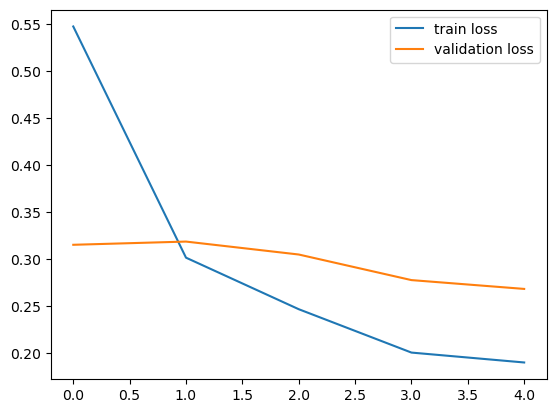

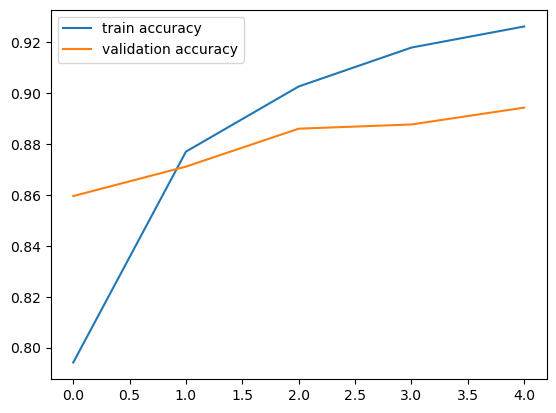

In [15]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

In [16]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)


input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted:  test.png


1/1 [==============================] - 0s 57ms/step
[[0.5236782 0.6777777]]
1
The person in the image is wearing a mask
